# Feature Scaling
Normalizing and standardizing are very similar techniques that change the range of values that a feature has. Doing so helps models learn faster and more robustly. 

Both of these processes are commonly referred to as *feature scaling*.

In this exercise, we'll use a dog training dataset to predict how many rescues a dog will perform on a given year, based on how old they were when their training began.

We'll train models with and without feature scaling and compare their behavior and results.

But first, let's load our dataset and inspect it:

In [1]:
import pandas
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/dog-training.csv
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/m1b_gradient_descent.py
url = "https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/dog-training.csv"
data = pandas.read_csv(url, delimiter="\t")
data.head()

,month_old_when_trained,mean_rescues_per_year,age_last_year,weight_last_year,rescues_last_year
0,68,21.1,9,14.5,35
1,53,14.9,5,14.0,30
2,41,20.5,6,17.7,34
3,3,19.4,1,13.7,29
4,4,24.9,4,18.4,30


The preceding dataset tells us at what age a dog began training, how many rescues they've performed on average per year, and other stats like their weight, what age they were last year, and how many rescues they performed in that period.

Note that we also have variables expressed in different units, such as `month_old_when_trained` in months, `age_last_year` in years, and `weight_last_year` in kilograms.

Having features in widely different ranges and units is a good indicator that a model can benefit from feature scaling.

First, let's train our model using the dataset "as is:"

In [2]:
from m1b_gradient_descent import gradient_descent
import numpy as np

# Train model using Gradient Descent
model = gradient_descent(data.month_old_when_trained, data.mean_rescues_per_year, learning_rate=5E-4, number_of_iterations=8000)


Iteration 0  Current estimate: y = 0.6551939999999999 * x + 0.01989 Cost: 285.7519204585047
Iteration 100  Current estimate: y = 0.37017703051219436 * x + 0.6317811959477302 Cost: 151.3711059205156
Iteration 200  Current estimate: y = 0.35765990734380276 * x + 1.233468946326008 Cost: 144.12794309730637
Iteration 300  Current estimate: y = 0.3454643601625017 * x + 1.819698805170826 Cost: 137.252166173823
Iteration 400  Current estimate: y = 0.33358212739619614 * x + 2.390867899414735 Cost: 130.7251406940121
Iteration 500  Current estimate: y = 0.3220051597199002 * x + 2.947363153447446 Cost: 124.52917737405625
Iteration 600  Current estimate: y = 0.3107256146029201 * x + 3.4895615512281988 Cost: 118.64748416158396
Iteration 700  Current estimate: y = 0.29973585099612604 * x + 4.01783039166423 Cost: 113.06412072651936
Iteration 800  Current estimate: y = 0.2890284241557118 * x + 4.532527537428349 Cost: 107.76395526023639
Iteration 900  Current estimate: y = 0.27859608059993735 * x + 5.03

## Training Analysis
In the preceding output, we're printing an estimate of weights and the calculated cost at each iteration.

The final line in the output shows that the model stopped training because it reached its maximum allowed number of iterations, but the cost could still be lower if we had let it run longer.

Let's plot the model at the end of this training:

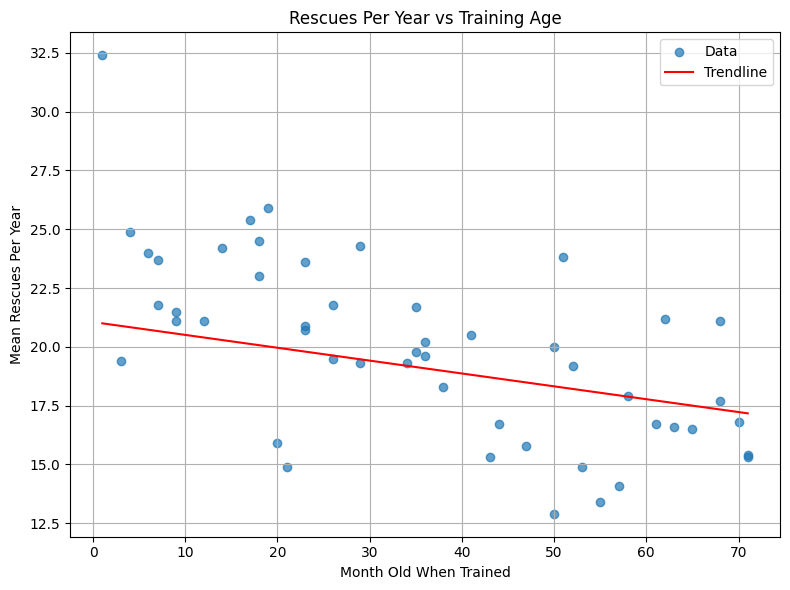

In [3]:
# Plot the data and trendline after training
import matplotlib.pyplot as plt

x = data["month_old_when_trained"]
y = data["mean_rescues_per_year"]

# Create scatter plot and trendline
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Data", alpha=0.7)

x_vals = np.linspace(x.min(), x.max(), 100)
x_vals_df = pandas.DataFrame({"month_old_when_trained": x_vals})
y_preds = model.predict(x_vals_df)

plt.plot(x_vals, y_preds, color="red", label="Trendline")

plt.xlabel("Month Old When Trained")
plt.ylabel("Mean Rescues Per Year")
plt.title("Rescues Per Year vs Training Age")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The preceding plot tells us that the younger a dog begins training, the more rescues it be perform in a year.

Notice that it doesn't fit the data very well (most points are above the line). That's due to training being cut off early, before the model could find the optimal weights.


## Standardizing data
Let's use *standardization* as the form of *feature scaling* for this model, applying it to the `month_old_when_trained` feature:

In [4]:
# Add the standardized verions of "age_when_trained" to the dataset.
# Notice that it "centers" the mean age around 0
data["standardized_age_when_trained"] = (data.month_old_when_trained - np.mean(data.month_old_when_trained)) / (np.std(data.month_old_when_trained))

# Print a sample of the new dataset
data[:5]

,month_old_when_trained,mean_rescues_per_year,age_last_year,weight_last_year,rescues_last_year,standardized_age_when_trained
0,68,21.1,9,14.5,35,1.537654
1,53,14.9,5,14.0,30,0.826655
2,41,20.5,6,17.7,34,0.257856
3,3,19.4,1,13.7,29,-1.543342
4,4,24.9,4,18.4,30,-1.495942


Notice the the values `standardized_age_when_trained` column above are distributed in a much smaller range (between -2 and 2) and have their mean centered around `0`.

## Visualizing Scaled Features

Let's use a box plot to compare the original feature values to their standardized versions:

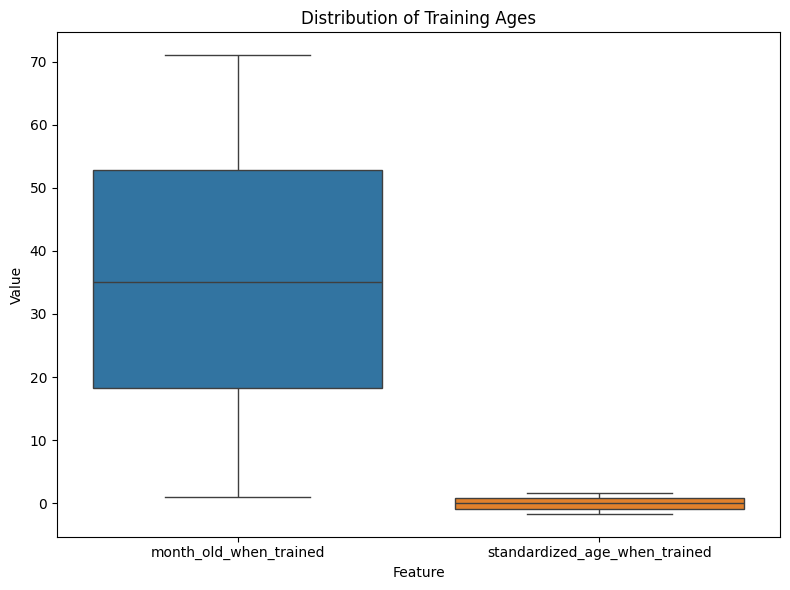

In [5]:
import seaborn as sns

# Set up the plot
plt.figure(figsize=(8, 6))

# Create the boxplot
sns.boxplot(data=data[["month_old_when_trained", "standardized_age_when_trained"]])

plt.title("Distribution of Training Ages")
plt.ylabel("Value")
plt.xlabel("Feature")

plt.tight_layout()
plt.show()

Now, compare the two features by hovering your mouse over the graph. You'll note that:

 - `month_old_when_trained` ranges from 1 to 71 and has its median centered around 35.

 - `standardized_age_when_trained` ranges from -1.6381 to 1.6798, and is centered exactly at 0.

## Training with standardized features

We can now retrain our model using the standardized feature in our dataset:

In [6]:
# Let's retrain our model, this time using the standardized feature
model_norm = gradient_descent(data.standardized_age_when_trained, data.mean_rescues_per_year, learning_rate=5E-4, number_of_iterations=8000)


Iteration 0  Current estimate: y = -0.002469271695567481 * x + 0.01989 Cost: 409.47558290398973
Iteration 100  Current estimate: y = -0.23732823396711047 * x + 1.9116805097144178 Cost: 336.7707406040323
Iteration 200  Current estimate: y = -0.4498267787096775 * x + 3.623357706888266 Cost: 277.25100655774355
Iteration 300  Current estimate: y = -0.6420937932658433 * x + 5.172069793284766 Cost: 228.52524594986943
Iteration 400  Current estimate: y = -0.8160554781852589 * x + 6.573332327196407 Cost: 188.63595906277715
Iteration 500  Current estimate: y = -0.9734546445990158 * x + 7.841183663924317 Cost: 155.98064104392154
Iteration 600  Current estimate: y = -1.1158681743324268 * x + 8.988325597103357 Cost: 129.24740317153262
Iteration 700  Current estimate: y = -1.2447228176779617 * x + 10.026250609868582 Cost: 107.3622692791277
Iteration 800  Current estimate: y = -1.3613094870961393 * x + 10.965357010711452 Cost: 89.44603003512722
Iteration 900  Current estimate: y = -1.466796190043848

Let's take a look at that output again.

Despite still being allowed a maximum of 8000 iterations, the model stopped at the 5700 mark.

Why? Because this time, using the standardized feature, it was quickly able to reach a point where the cost could no longer be improved.

In other words, it "converged" much faster than the previous version.

## Plotting the standardized model

We can now plot the new model and see the results of standardization:

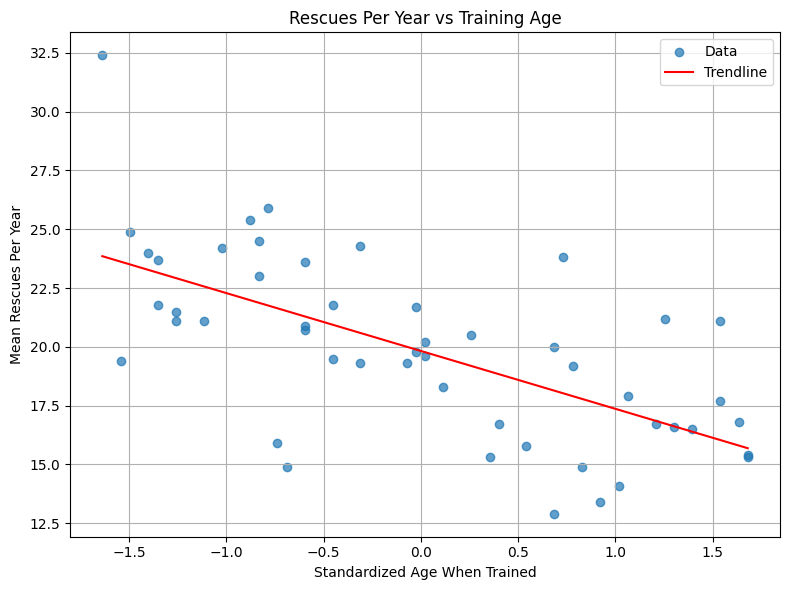

In [7]:
# Plot the data and trendline again, after training with standardized feature
x = data["standardized_age_when_trained"]
y = data["mean_rescues_per_year"]

# Create scatter plot and trendline
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Data", alpha=0.7)

x_vals = np.linspace(x.min(), x.max(), 100)
x_vals_df = pandas.DataFrame({"month_old_when_trained": x_vals})
y_preds = model_norm.predict(x_vals_df)

plt.plot(x_vals, y_preds, color="red", label="Trendline")

plt.xlabel("Standardized Age When Trained")
plt.ylabel("Mean Rescues Per Year")
plt.title("Rescues Per Year vs Training Age")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

It looks like this model fits the data much better that the first one!

The standardized model shows a larger slope and data now centered on `0` on the X-axis, both factors which should allow the model to converge faster.

But how much faster?

Let's plot a comparison between models to visualize the improvements.

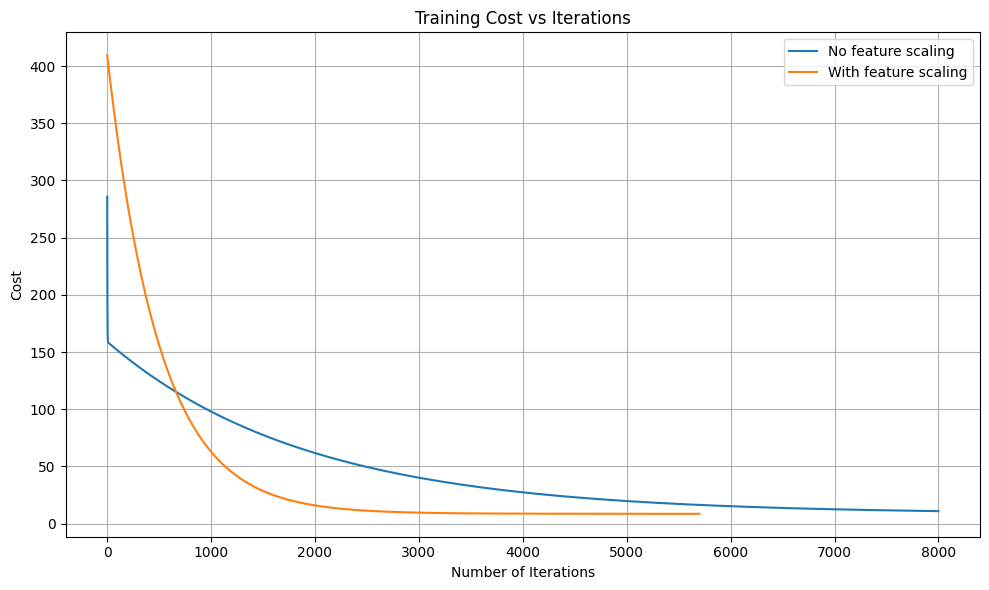

In [8]:
cost1 = model.cost_history
cost2 = model_norm.cost_history

# Creates dataframes with the cost history for each model
df1 = pandas.DataFrame({"cost": cost1, "Model":"No feature scaling"})
df1["number of iterations"] = df1.index + 1
df2 = pandas.DataFrame({"cost": cost2, "Model":"With feature scaling"})
df2["number of iterations"] = df2.index + 1

# Concatenate dataframes into a single one that we can use in our plot
df = pandas.concat([df1, df2])

# Group the data by model and plot each cost history
plt.figure(figsize=(10, 6))

for label, group in df.groupby("Model"):
    plt.plot(group["number of iterations"], group["cost"], label=label)

plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Training Cost vs Iterations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This plot clearly shows that using a standardized dataset allowed our model to converge much faster. Reaching the lowest cost and finding the optimal weights required a much smaller number of iterations.

This is very important when you are developing a new model, because it allows you to iterate quicker; but also when your model is deployed to a production environment, because it requires less compute time for training and costs less than a "slow" model.

## Summary
In this exercise, we covered the following concepts:

- How _Feature scaling_ techniques are used to improve the efficiency of training models
- How to add a standardized feature to a dataset
- How to visualize standardized features and compare them to their original values

Finally, we compared the performance of models before and after using standardized features, using plots to visualize the improvements.

